In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

In [2]:
Y = pd.read_csv('../input/kerotoconus/labels.csv')
Y=Y.iloc[:,2]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)

In [3]:
X = pd.read_csv('../input/kerotoconus/dataset.csv')
X.drop(['Unnamed: 0'], axis=1, inplace=True)
X.drop(['En.Anterior.'], axis=1, inplace=True)
X.drop(['idEye'], axis=1, inplace=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [4]:
input_d=X_train.shape[1]
print(X_train.shape)

(2529, 445)


In [5]:
model=Sequential()
model.add(Dense(1024,activation='relu',input_dim=input_d))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

2022-04-10 07:23:16.172348: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
hist=model.fit(X_train,Y_train,validation_split=0.2,epochs=90,batch_size=256)

2022-04-10 07:23:16.526089: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/90
8/8 [==============================] - 1s 63ms/step - loss: 319.4834 - accuracy: 0.5324 - val_loss: 51.2773 - val_accuracy: 0.8241
Epoch 2/90
8/8 [==============================] - 0s 28ms/step - loss: 76.2247 - accuracy: 0.6228 - val_loss: 70.0510 - val_accuracy: 0.8241
Epoch 3/90
8/8 [==============================] - 0s 35ms/step - loss: 48.7160 - accuracy: 0.7301 - val_loss: 43.6016 - val_accuracy: 0.8241
Epoch 4/90
8/8 [==============================] - 0s 27ms/step - loss: 36.7247 - accuracy: 0.6298 - val_loss: 39.7311 - val_accuracy: 0.8241
Epoch 5/90
8/8 [==============================] - 0s 28ms/step - loss: 28.1657 - accuracy: 0.6421 - val_loss: 38.3241 - val_accuracy: 0.8241
Epoch 6/90
8/8 [==============================] - 0s 28ms/step - loss: 40.9086 - accuracy: 0.7336 - val_loss: 47.2411 - val_accuracy: 0.8241
Epoch 7/90
8/8 [==============================] - 0s 28ms/step - loss: 33.9538 - accuracy: 0.7084 - val_loss: 22.1691 - val_accuracy: 0.8281
Epoch 8/90
8

In [8]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


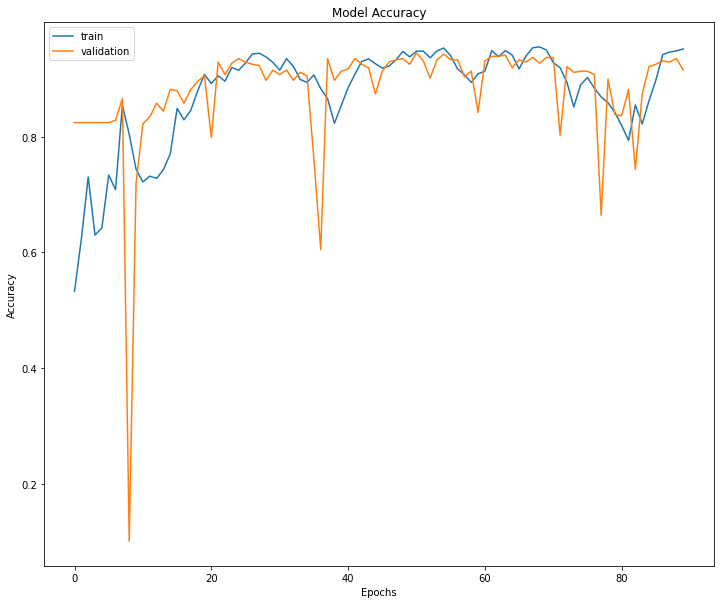

In [9]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
plt.figure(figsize=(12,10))
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

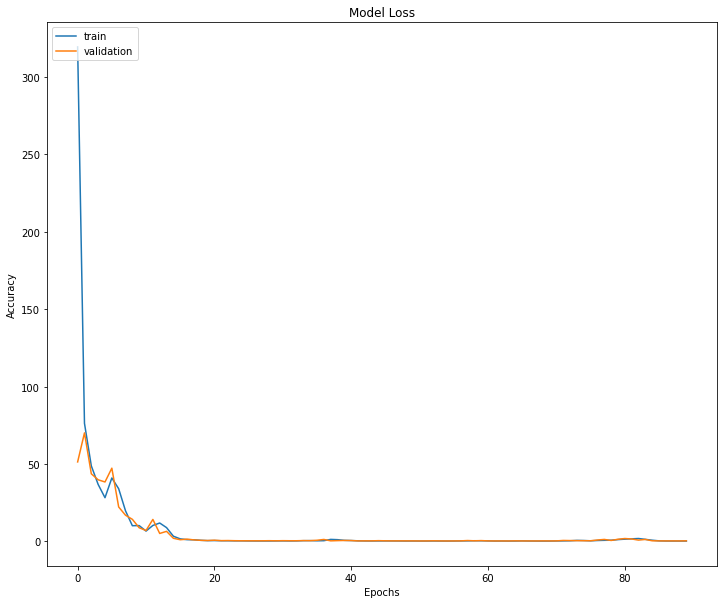

In [10]:
acc=hist.history['loss']
val_acc=hist.history['val_loss']
plt.figure(figsize=(12,10))
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
model.save('keratoconus_cnn.h5')

In [12]:
Y_pred=model.predict(X_test)
Y_pred=list(map(np.argmax,np.array(Y_pred)))
Y_test=list(map(np.argmax,np.array(Y_test)))
print(accuracy_score(Y_test,Y_pred))

0.9146919431279621


In [13]:
hist1=model.fit(X_train,Y_train,validation_split=0.2,epochs=90,batch_size=128)

Epoch 1/90
16/16 [==============================] - 0s 19ms/step - loss: 0.1637 - accuracy: 0.9377 - val_loss: 0.2052 - val_accuracy: 0.9387
Epoch 2/90
16/16 [==============================] - 0s 16ms/step - loss: 0.1427 - accuracy: 0.9486 - val_loss: 0.2505 - val_accuracy: 0.9249
Epoch 3/90
16/16 [==============================] - 0s 16ms/step - loss: 0.1757 - accuracy: 0.9343 - val_loss: 0.2129 - val_accuracy: 0.9249
Epoch 4/90
16/16 [==============================] - 0s 16ms/step - loss: 0.1465 - accuracy: 0.9417 - val_loss: 0.3555 - val_accuracy: 0.8854
Epoch 5/90
16/16 [==============================] - 0s 17ms/step - loss: 0.1370 - accuracy: 0.9511 - val_loss: 0.1931 - val_accuracy: 0.9427
Epoch 6/90
16/16 [==============================] - 0s 16ms/step - loss: 0.1468 - accuracy: 0.9461 - val_loss: 0.1940 - val_accuracy: 0.9447
Epoch 7/90
16/16 [==============================] - 0s 17ms/step - loss: 0.1537 - accuracy: 0.9427 - val_loss: 0.2157 - val_accuracy: 0.9387
Epoch 8/90
16

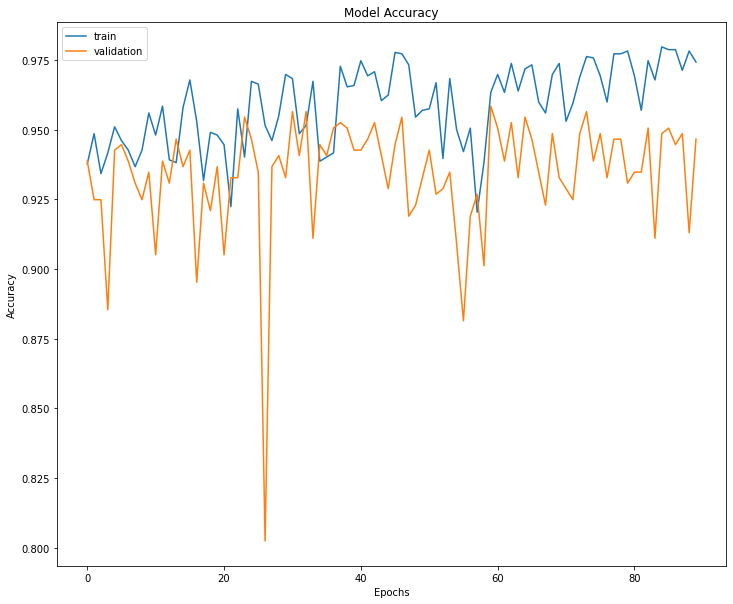

In [14]:
acc=hist1.history['accuracy']
val_acc=hist1.history['val_accuracy']
plt.figure(figsize=(12,10))
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

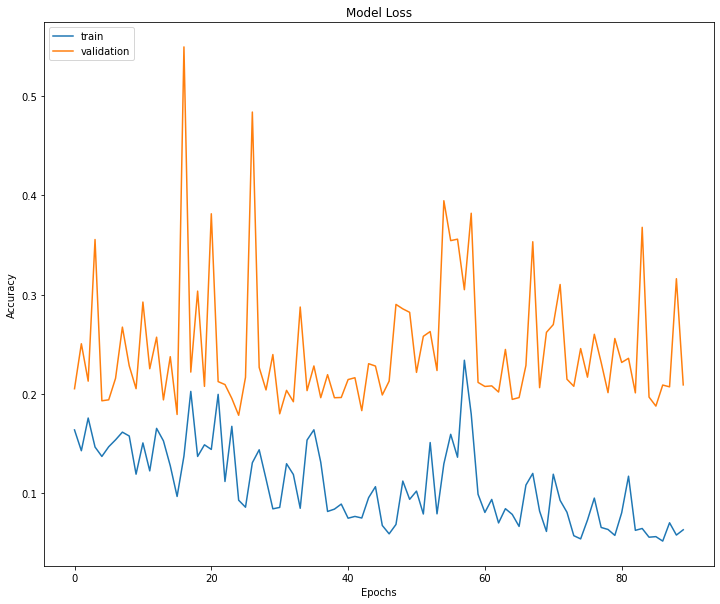

In [15]:
acc=hist1.history['loss']
val_acc=hist1.history['val_loss']
plt.figure(figsize=(12,10))
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
hist2=model.fit(X_train,Y_train,validation_split=0.2,epochs=90,batch_size=64)

Epoch 1/90
32/32 [==============================] - 1s 32ms/step - loss: 0.2831 - accuracy: 0.9140 - val_loss: 0.5746 - val_accuracy: 0.8696
Epoch 2/90
32/32 [==============================] - 0s 12ms/step - loss: 0.2498 - accuracy: 0.9352 - val_loss: 0.7006 - val_accuracy: 0.7530
Epoch 3/90
32/32 [==============================] - 0s 12ms/step - loss: 0.2291 - accuracy: 0.9199 - val_loss: 0.4086 - val_accuracy: 0.8953
Epoch 4/90
32/32 [==============================] - 0s 11ms/step - loss: 0.5090 - accuracy: 0.8838 - val_loss: 0.3469 - val_accuracy: 0.9170
Epoch 5/90
32/32 [==============================] - 0s 11ms/step - loss: 0.5255 - accuracy: 0.8764 - val_loss: 0.4382 - val_accuracy: 0.9111
Epoch 6/90
32/32 [==============================] - 0s 11ms/step - loss: 1.2352 - accuracy: 0.8300 - val_loss: 2.6236 - val_accuracy: 0.8538
Epoch 7/90
32/32 [==============================] - 0s 11ms/step - loss: 1.0369 - accuracy: 0.8280 - val_loss: 0.8446 - val_accuracy: 0.8518
Epoch 8/90
32

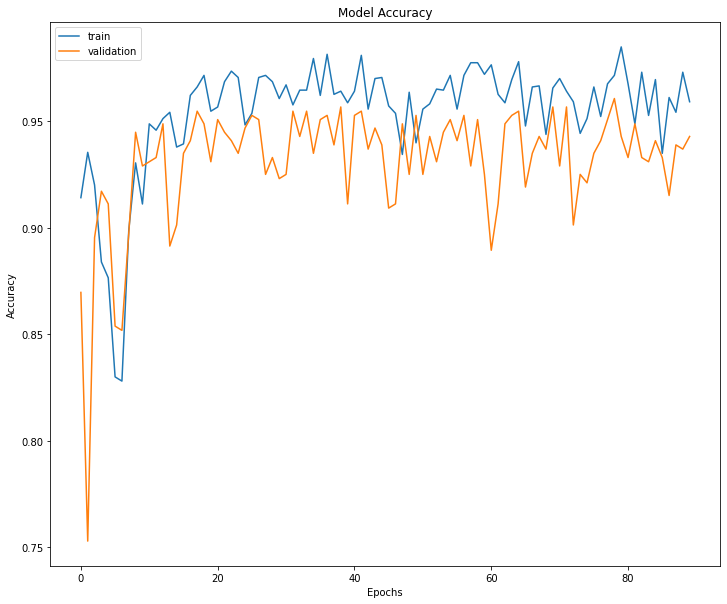

In [17]:
acc=hist2.history['accuracy']
val_acc=hist2.history['val_accuracy']
plt.figure(figsize=(12,10))
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

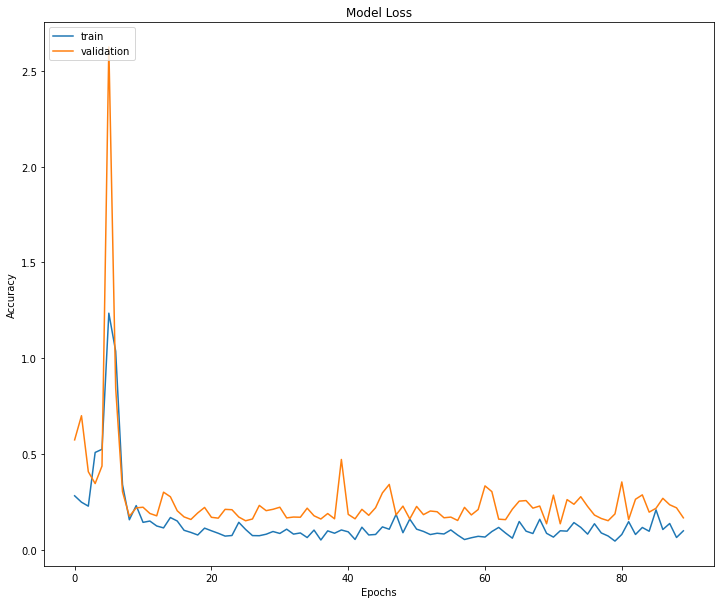

In [18]:
acc=hist2.history['loss']
val_acc=hist2.history['val_loss']
plt.figure(figsize=(12,10))
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
model.save('Keratoconus.h5')

In [20]:
from sklearn.metrics import classification_report

target_names =['class 1','class 2','class 3','class 4']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.79      0.86      0.82        49
     class 2       0.98      0.92      0.95       525
     class 3       0.60      0.96      0.74        47
     class 4       0.71      0.83      0.77        12

    accuracy                           0.91       633
   macro avg       0.77      0.89      0.82       633
weighted avg       0.93      0.91      0.92       633

